___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.0 MB/s 


In [2]:
## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score, average_precision_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import auc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# df0 = pd.read_csv('creditcard.csv')
df0=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = df0.copy()
df.head(3) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [6]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [8]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
#check if any null values
df.isnull().sum().sum() 

0

In [11]:
df.duplicated().sum()

1081

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(283726, 31)

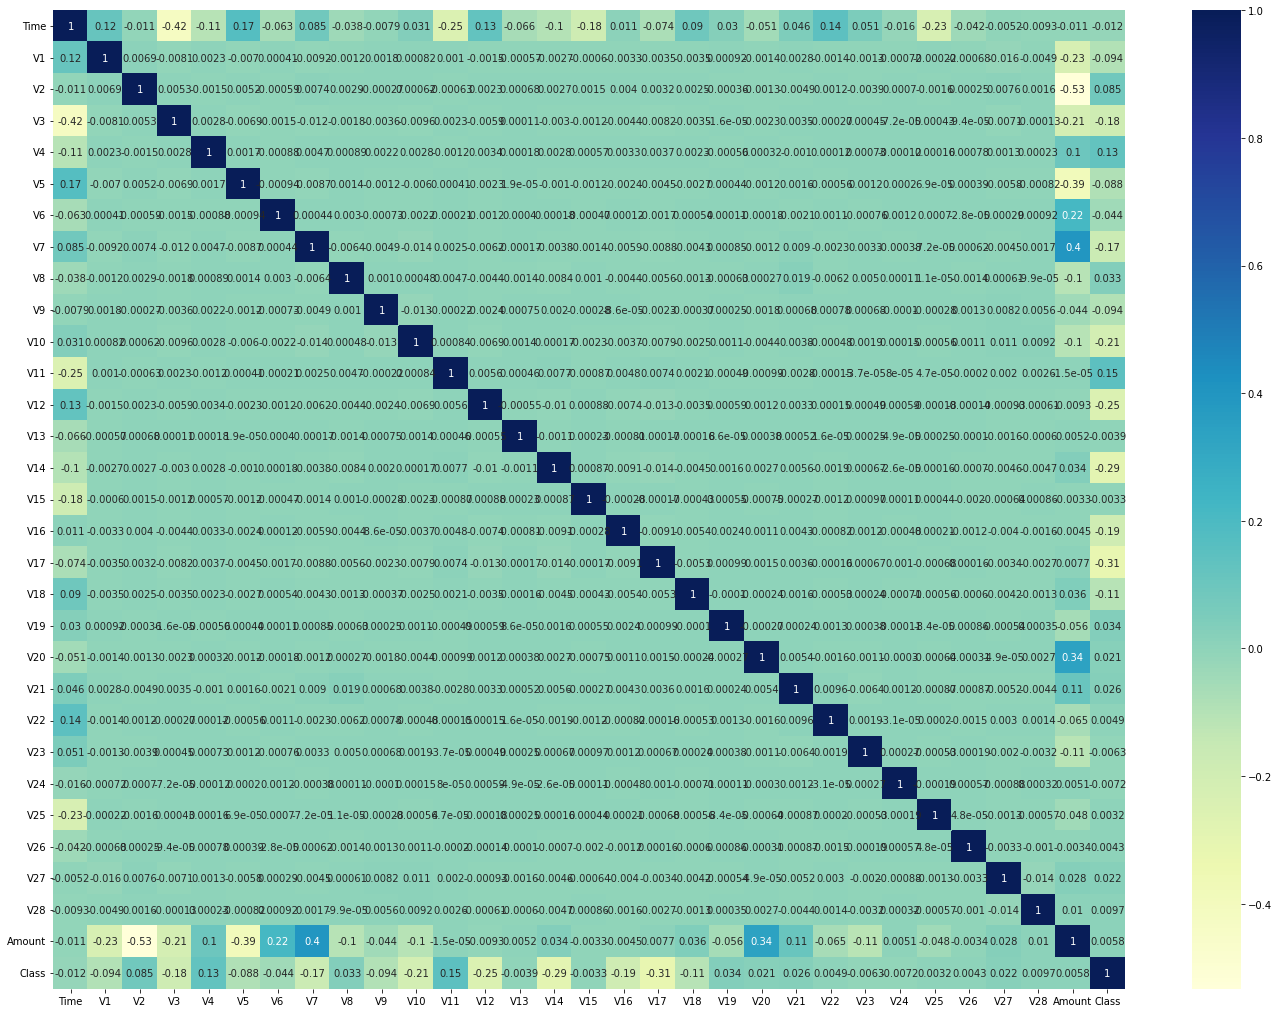

In [14]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Here we will observe the distribution of our classes

In [15]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share,fraud_share)

99.83328986416473 0.1667101358352777


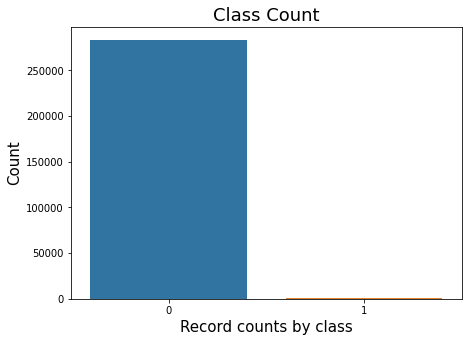

In [16]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

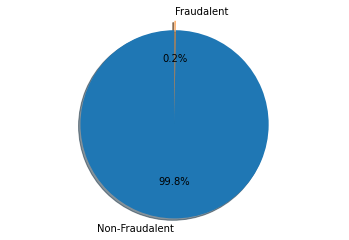

In [17]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [18]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


### So we have 492 fraudalent transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [19]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



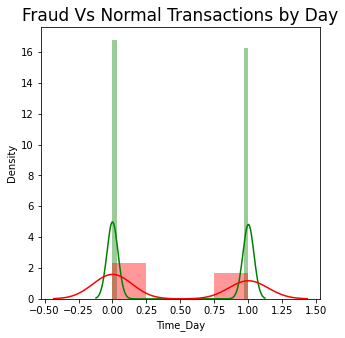

In [20]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

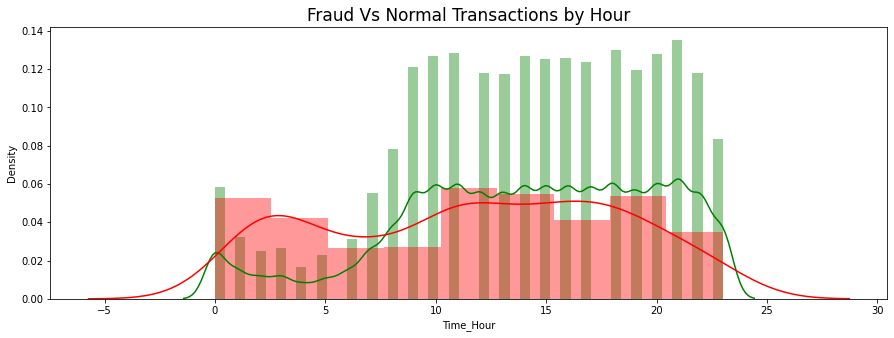

In [21]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

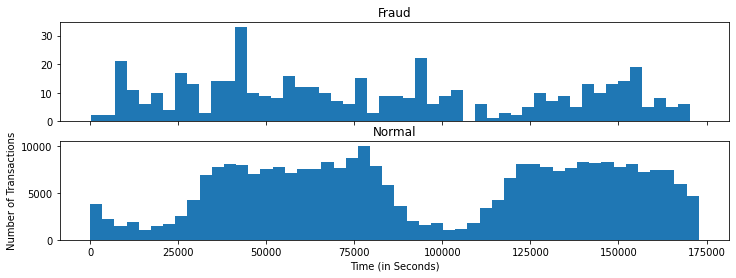

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [23]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [24]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


In [25]:
df[df.Amount > 2250]["Amount"].count()

538

Text(0.5, 1.05, 'Amount vs Class Distribution')

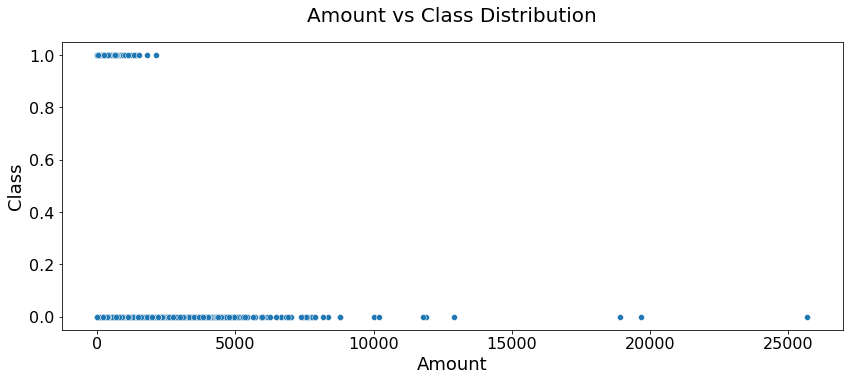

In [26]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


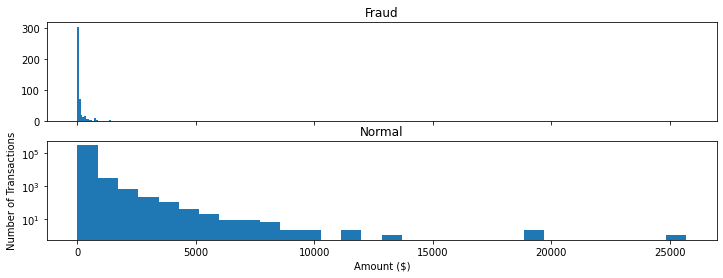

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [28]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.149067
V4,0.129326
V2,0.084624
V19,0.033631


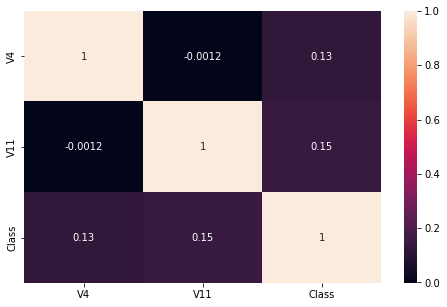

In [29]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = df.corr().index[abs(df.corr()['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Data Cleaning
Check Missing Values and Outliers

In [30]:
#check if any null values
df.isnull().sum().sum() 

0

In [31]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import colorama
from colorama import *

In [33]:
# OUTLIERS

iqr_factor = [2.5, 3]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df.iloc[:, [0,1,3]].columns:
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 2:
            list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 2.5 IQR :
-------------------------------------
V1                             :  2841
V3                             :  1105

TOTAL OUTLIERS FOR 2.5 IQR : 3946

Outliers for 3 IQR :
-------------------------------------
V1                             :  1949
V3                             :  738

TOTAL OUTLIERS FOR 3 IQR : 2687



In [34]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [35]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


---
---


## 2. Data Preprocessing

#### Scaling

In [36]:
df1 = df.copy()

In [37]:
scaler = StandardScaler()

df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Time_Hour"] = scaler.fit_transform(df["Time_Hour"].values.reshape(-1,1))

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [38]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [39]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,-2.407217
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,-2.407217
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,-2.407217
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,-2.407217
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,-2.407217


In [40]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [41]:
from sklearn import model_selection

***ii. Model Training***

In [42]:
lr_model = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

***iii. Prediction and Model Evaluating***

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()

Test_Set
[[55345  1311]
 [   12    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.87      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221191   5406]
 [    30    353]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226597
           1       0.06      0.92      0.11       383

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980



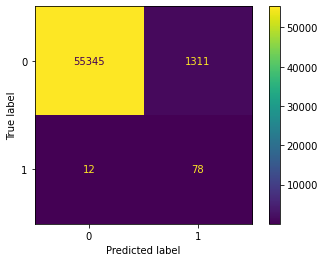

In [44]:
eval_metric(lr_model, X_train, y_train, X_test, y_test)


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


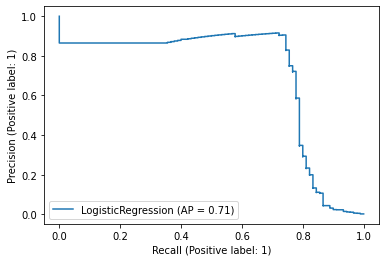

In [45]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
plot_precision_recall_curve(lr_model, X_test, y_test)

<a id="5.2.3"></a>
#### <p style="background-color:#19D1D1; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.2.3 Logistic Regression Cross Validation</p>



In [46]:
!pip install termcolor
!pip install colorama
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [48]:
lr_model_cv = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)
lr_model_cv_scores = cross_validate(lr_model_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
lr_model_cv_scores = pd.DataFrame(lr_model_cv_scores, index = range(1, 11))
lr_model_cv_scores.mean()[2:]

test_accuracy     0.975883
test_precision    0.060342
test_recall       0.911134
test_f1           0.113164
test_roc_auc      0.980067
dtype: float64

<a id="5.2.4"></a>
#### <p style="background-color:#19D1D1; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.2.4 Logistic Regression GridSearchCV</p>



In [49]:
param_grid = { "class_weight" : ["balanced", None],
              'penalty': ["l1","l2"],
              'solver' : ['saga','lbfgs'],
              }

In [50]:
lr_model_grid = LogisticRegression(class_weight = 'balanced', random_state = 42)
lr_grid_model = GridSearchCV(lr_model_grid, param_grid, scoring = "f1", verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [51]:
lr_grid_model.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
lr_model_tuned = LogisticRegression(class_weight = 'none',
                                  penalty = 'l2', 
                                  solver = 'saga',
                                  random_state = 42).fit(X_train, y_train)

In [53]:
y_pred = lr_model_tuned.predict(X_test)
y_train_pred = lr_model_tuned.predict(X_train)

Test_Set
[[56651     5]
 [   43    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.52      0.66        90

    accuracy                           1.00     56746
   macro avg       0.95      0.76      0.83     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226565     32]
 [   162    221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.87      0.58      0.69       383

    accuracy                           1.00    226980
   macro avg       0.94      0.79      0.85    226980
weighted avg       1.00      1.00      1.00    226980



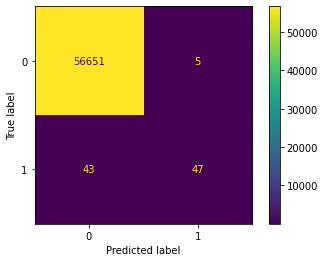

In [54]:
eval_metric(lr_model_tuned, X_train, y_train, X_test, y_test)

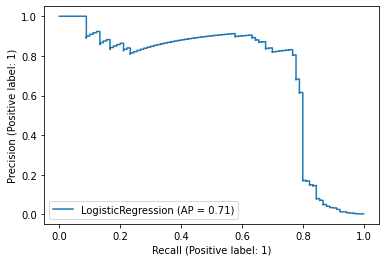

In [55]:
plot_precision_recall_curve(lr_model_tuned, X_test, y_test)

***v. Apply StratifiedKFold*** 

In [56]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# create model
model = LogisticRegression(class_weight = 'none',
                                  penalty = 'l2', 
                                  solver = 'saga',
                                  random_state = 42)
# evaluate model
scores = cross_validate(model, X_train, y_train, scoring=('f1',"recall", "precision", "accuracy"), cv=cv, n_jobs=-1)

In [57]:
str_scores = pd. DataFrame. from_dict(scores) 
str_scores[2:].mean(axis=0).T[2:]


test_f1           0.707152
test_recall       0.588745
test_precision    0.890036
test_accuracy     0.999178
dtype: float64

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling

In [59]:
df_smote = df.copy()

In [60]:
y= df_smote['Class']
X = df_smote.drop(['Class'], axis=1)

In [61]:
scaler = StandardScaler()

df_smote["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df_smote["Time_Hour"] = scaler.fit_transform(df["Time_Hour"].values.reshape(-1,1))

In [62]:
SMOTE = over_sampling.SMOTE(random_state=42)

In [63]:
X_Smote, y_Smote= SMOTE.fit_resample(X, y)

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_Smote, y_Smote,  test_size = 0.2, random_state = 42)

In [65]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape  : ', X_test.shape)

X_train.shape :  (453204, 30)
X_test.shape  :  (113302, 30)


In [66]:
y_train.value_counts()

0    226790
1    226414
Name: Class, dtype: int64

In [67]:
y_test.value_counts()

1    56839
0    56463
Name: Class, dtype: int64

***ii. Model Training***

In [68]:
lr_model_smote = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)
lr_model_smote.fit(X_train, y_train)
y_pred = lr_model_smote.predict(X_test)
y_train_pred = lr_model_smote.predict(X_train)

***iii. Prediction and Model Evaluating***

Test_Set
[[54988  1475]
 [ 4826 52013]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302


Train_Set
[[220888   5902]
 [ 19144 207270]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    226790
           1       0.97      0.92      0.94    226414

    accuracy                           0.94    453204
   macro avg       0.95      0.94      0.94    453204
weighted avg       0.95      0.94      0.94    453204



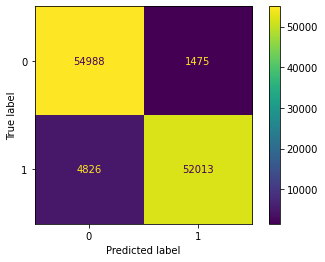

In [69]:
eval_metric(lr_model_smote, X_train, y_train, X_test, y_test)

***iv.  Plot Precision and Recall Curve***


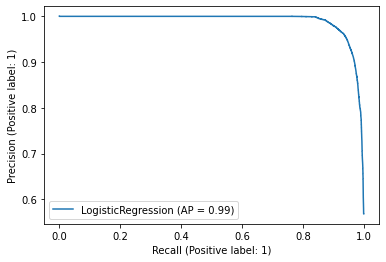

In [70]:
plot_precision_recall_curve(lr_model_smote, X_test, y_test)

***v. Apply StratifiedKFold***

In [71]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# create model
model = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)

# evaluate model
scores = cross_validate(model, X_train, y_train, scoring=('f1',"recall", "precision", "accuracy"), cv=cv, n_jobs=-1)

In [72]:
str_scores = pd. DataFrame. from_dict(scores) 
str_scores[2:].mean(axis=0).T[2:]


test_f1           0.943329
test_recall       0.915494
test_precision    0.972910
test_accuracy     0.945047
dtype: float64

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [73]:
RF_smote_model = RandomForestClassifier(class_weight = "balanced", max_depth=5, random_state = 42)
RF_smote_model.fit(X_train, y_train)
y_pred = RF_smote_model.predict(X_test)
y_train_pred = RF_smote_model.predict(X_train)

***ii. Prediction and Model Evaluating***

Test_Set
[[56237   226]
 [ 6540 50299]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     56463
           1       1.00      0.88      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302


Train_Set
[[225879    911]
 [ 25775 200639]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94    226790
           1       1.00      0.89      0.94    226414

    accuracy                           0.94    453204
   macro avg       0.95      0.94      0.94    453204
weighted avg       0.95      0.94      0.94    453204



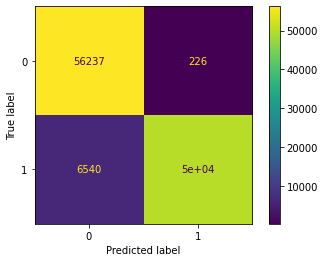

In [74]:
eval_metric(RF_smote_model, X_train, y_train, X_test, y_test)

***iii. Plot Precision and Recall Curve***


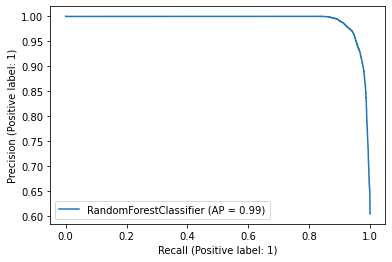

In [75]:
plot_precision_recall_curve(RF_smote_model, X_test, y_test)

<a id="6.3.4"></a>
#### <p style="background-color:#19D1D1; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.3.4 Random Forest Classifier GridSearchCV</p>



In [77]:
param_grid = {'n_estimators' : [50, 100],
              'max_features' : [4,5],
              'max_depth' : [ 5, 7],
              'min_samples_split' : [2, 5]}

In [78]:
RF_smote_grid = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
RF_smote_grid_model = GridSearchCV(estimator = RF_smote_grid, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)
RF_smote_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': [4, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=2)

In [79]:
RF_smote_grid_model.best_params_

{'max_depth': 7, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 50}

In [80]:
RFSmote_tuned = RandomForestClassifier(class_weight = 'balanced',
                                       max_depth = 7,
                                       max_features = 5,
                                       min_samples_split = 5,
                                       n_estimators = 50,
                                       random_state = 42).fit(X_train, y_train)

In [81]:
y_pred = RFSmote_tuned.predict(X_test)
y_train_pred = RFSmote_tuned.predict(X_train)

Test_Set
[[56325   138]
 [ 4143 52696]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     56463
           1       1.00      0.93      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302


Train_Set
[[226197    593]
 [ 15887 210527]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    226790
           1       1.00      0.93      0.96    226414

    accuracy                           0.96    453204
   macro avg       0.97      0.96      0.96    453204
weighted avg       0.97      0.96      0.96    453204



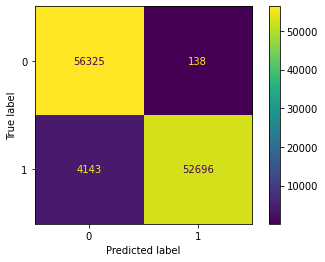

In [82]:
eval_metric(RFSmote_tuned, X_train, y_train, X_test, y_test)

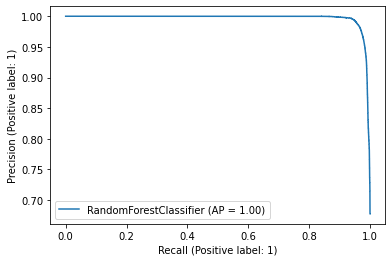

In [83]:
plot_precision_recall_curve(RFSmote_tuned, X_test, y_test)

***iv. Apply StratifiedKFold***

In [84]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# create model
model = RandomForestClassifier(class_weight = "balanced", random_state = 42)

# evaluate model
scores = cross_validate(model, X_train, y_train, scoring=('f1',"recall", "precision", "accuracy"), cv=cv, n_jobs=-1)

In [85]:
str_scores = pd. DataFrame. from_dict(scores) 
str_scores[2:].mean(axis=0).T[2:]


test_f1           0.99986
test_recall       1.00000
test_precision    0.99972
test_accuracy     0.99986
dtype: float64

### XCBoost Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

***ii. Prediction and Model Evaluating***

Test_Set
[[55832   631]
 [ 1950 54889]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302


Train_Set
[[224279   2511]
 [  7279 219135]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226790
           1       0.99      0.97      0.98    226414

    accuracy                           0.98    453204
   macro avg       0.98      0.98      0.98    453204
weighted avg       0.98      0.98      0.98    453204



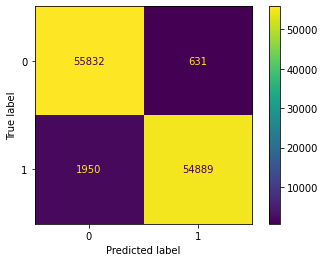

In [88]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

***iii. Plot Precision and Recall Curve***


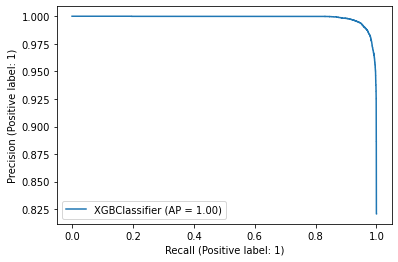

In [89]:
plot_precision_recall_curve(xgb, X_test, y_test)

***iv. Apply StratifiedKFold***

In [97]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# create model
model =  XGBClassifier(random_state=42)
# evaluate model
scores = cross_validate(model, X_train, y_train, scoring=('f1',"recall", "precision", "accuracy"), cv=cv, n_jobs=-1)

In [98]:
str_scores = pd. DataFrame. from_dict(scores) 
str_scores[2:].mean(axis=0).T[2:]


test_f1           0.977780
test_recall       0.967729
test_precision    0.988043
test_accuracy     0.978027
dtype: float64

<a id="8"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">8 - THE COMPARISON OF MODELS<p>

 
 

In [103]:
y_pred = lr_model_smote.predict(X_test)
y_train_pred = lr_model_smote.predict(X_train)

lr_model_smote_f1 = f1_score(y_test, y_pred)
lr_model_smote_recall = recall_score(y_test, y_pred)
lr_model_auc = roc_auc_score(y_test, y_pred)

In [106]:
y_pred = RFSmote_tuned.predict(X_test)
y_train_pred = RFSmote_tuned.predict(X_train)

RFSmote_tuned_f1 = f1_score(y_test, y_pred)
RFSmote_tuned_recall = recall_score(y_test, y_pred)
RFSmote_tuned_auc = roc_auc_score(y_test, y_pred)

In [107]:
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

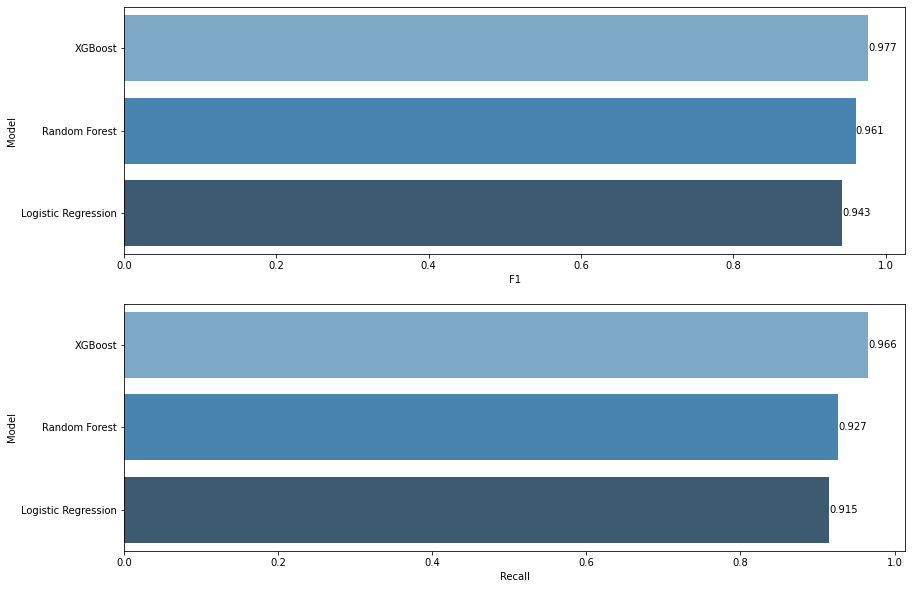

In [111]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "XGBoost"],
                        "F1": [lr_model_smote_f1,RFSmote_tuned_f1, xgb_f1 ],
                        "Recall": [lr_model_smote_recall, RFSmote_tuned_recall, xgb_recall],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)


<a id="9"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">9 - FINAL MODEL<p>

For the final model, I will first look at the correlation values of the df_out columns and the feature importance values of the Random Forest Classifier default and tuned models created with SMOTE data above. 

In [114]:
## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


## Feature importances

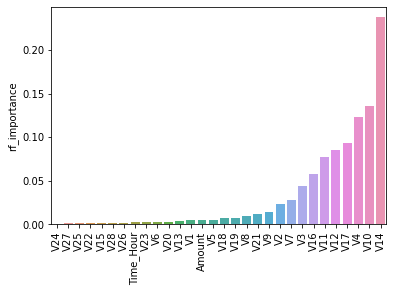

In [128]:
model = RFSmote_tuned
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['rf_importance'])
xgb_imp_feats = feats.sort_values("rf_importance")
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='rf_importance')
plt.xticks(rotation=90);

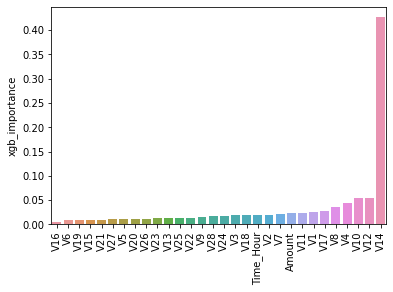

In [125]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")

sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')
plt.xticks(rotation=90);

Based on the above values, I create the data for my final model with the following columns. 

In [134]:
df_deploy = df[['V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']].copy()
df_deploy.head(1)

,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,-0.072781,2.536347,1.378155,0.239599,0.090794,-0.5516,-0.617801,-0.311169,-0.470401,0.207971,0


In [135]:
X = df_deploy.drop(['Class'], axis = 1)
y = df_deploy['Class']

In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [137]:
SMOTE = over_sampling.SMOTE(random_state=42)

In [138]:
X, y= SMOTE.fit_resample(X, y)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [140]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape  : ', X_test.shape)

X_train.shape :  (453204, 10)
X_test.shape  :  (113302, 10)


In [141]:
y_train.value_counts()

0    226602
1    226602
Name: Class, dtype: int64

In [142]:
y_test.value_counts()

1    56651
0    56651
Name: Class, dtype: int64

**Final Model with Logistic Regression (With Feature Importance and SMOTE)**

LogReg_Deploy
------------------
Test_Set
[[55236  1415]
 [ 5788 50863]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     56651
           1       0.97      0.90      0.93     56651

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302


Train_Set
[[220752   5850]
 [ 23828 202774]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    226602
           1       0.97      0.89      0.93    226602

    accuracy                           0.93    453204
   macro avg       0.94      0.93      0.93    453204
weighted avg       0.94      0.93      0.93    453204



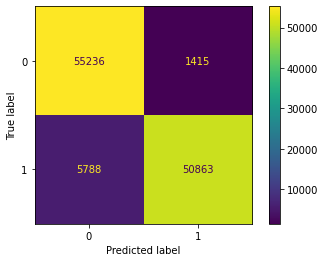

In [144]:
LogReg_Deploy = LogisticRegression(class_weight = 'balanced',
                                         penalty = 'l2', 
                                         solver = 'lbfgs',
                                         random_state = 42).fit(X_train, y_train)

y_pred = LogReg_Deploy.predict(X_test)
y_train_pred = LogReg_Deploy.predict(X_train)

LogReg_Deploy_f1 = f1_score(y_test, y_pred)
LogReg_Deploy_acc = accuracy_score(y_test, y_pred)
LogReg_Deploy_recall = recall_score(y_test, y_pred)
LogReg_Deploy_auc = roc_auc_score(y_test, y_pred)
LogReg_Deploy_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
LogReg_Deploy_recall_auc = auc(recall, precision)

print("LogReg_Deploy")
print ("------------------")
eval_metric(LogReg_Deploy, X_train, y_train, X_test, y_test)

**Final Model with Random Forest Classifier (With Feature Importance and SMOTE)**

RandomForest_Deploy
------------------
Test_Set
[[56038   613]
 [ 2800 53851]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56651
           1       0.99      0.95      0.97     56651

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302


Train_Set
[[224200   2402]
 [ 11081 215521]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    226602
           1       0.99      0.95      0.97    226602

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204



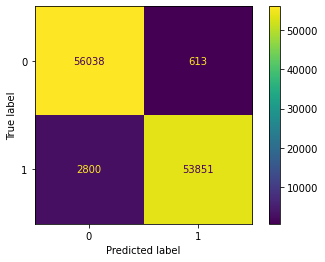

In [145]:
RandomForest_Deploy = RandomForestClassifier(class_weight = 'balanced',
                                       max_depth = 7,
                                       max_features = 5,
                                       min_samples_split = 5,
                                       n_estimators = 50,
                                       random_state = 42).fit(X_train, y_train)

y_pred = RandomForest_Deploy.predict(X_test)
y_train_pred = RandomForest_Deploy.predict(X_train)

RandomForest_Deploy_f1 = f1_score(y_test, y_pred)
RandomForest_Deploy_acc = accuracy_score(y_test, y_pred)
RandomForest_Deploy_recall = recall_score(y_test, y_pred)
RandomForest_Deploy_auc = roc_auc_score(y_test, y_pred)
RandomForest_Deploy_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
RandomForest_Deploy_recall_auc = auc(recall, precision)

print("RandomForest_Deploy")
print ("------------------")
eval_metric(RandomForest_Deploy, X_train, y_train, X_test, y_test)

**Final Model with XGBoost Classifier (With Feature Importance and SMOTE)**

XGBoost_Deploy
------------------
Test_Set
[[55637  1014]
 [ 3023 53628]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     56651
           1       0.98      0.95      0.96     56651

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302


Train_Set
[[222528   4074]
 [ 12291 214311]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    226602
           1       0.98      0.95      0.96    226602

    accuracy                           0.96    453204
   macro avg       0.96      0.96      0.96    453204
weighted avg       0.96      0.96      0.96    453204



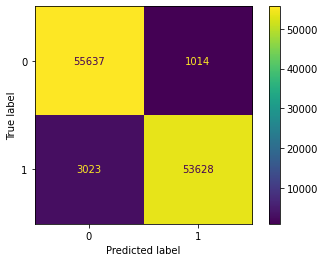

In [148]:
XGBoost_Deploy = XGBClassifier(random_state=42).fit(X_train, y_train)

y_pred = XGBoost_Deploy.predict(X_test)
y_train_pred = XGBoost_Deploy.predict(X_train)

XGBoost_Deploy_f1 = f1_score(y_test, y_pred)
XGBoost_Deploy_acc = accuracy_score(y_test, y_pred)
XGBoost_Deploy_recall = recall_score(y_test, y_pred)
XGBoost_Deploy_auc = roc_auc_score(y_test, y_pred)
XGBoost_Deploy_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
XGBoost_Deploy_recall_auc = auc(recall, precision)

print("XGBoost_Deploy")
print ("------------------")
eval_metric(XGBoost_Deploy, X_train, y_train, X_test, y_test)

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [149]:
import pickle

In [150]:
lr_model = pickle.dump(lr_model_smote, open('logreg', 'wb'))

In [151]:
RFSmote_tuned = pickle.dump(RFSmote_tuned, open('ranfor', 'wb'))

In [152]:
xgb_grid = pickle.dump(xgb, open('XG', 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___